# Mathematical Statistics Project - Part 1

### Confidence Intervals

In this assignment, you will focus on computing the confidence interval for the mean of a dataset using statistical methods. Confidence intervals are a key concept in inferential statistics, allowing us to estimate a range of plausible values for a population parameter (in this case, the mean) based on sample data. The goal is to understand and apply the formula for constructing a confidence interval and interpret the results in a practical context.


In the below code, a simulated dataset of employee salaries (in USD) is created. The dataset contains 100 salaries sampled from a normal distribution with Mean salary = 55000 and standard deviation = 8000.

Your task is to compute the 95% confidence interval for the mean salary of employees using sample data, using your understanding of confidence intervals, Z-scores, and margin of error calculations.


In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats

# Step 1: Generating the synthetic dataset
# Setting seed for reproducibility
np.random.seed(42)

# Generating a dataset of employee salaries (in USD) with a normal distribution
# Mean salary = 55000, Standard deviation = 8000, Sample size = 100

population_mean = 55000
population_standard_deviation = 8000
sample_size = 100

salaries = np.random.normal(loc=population_mean, scale=population_standard_deviation, size=sample_size)
sample_mean = np.mean(salaries)

# Creating a DataFrame to store the dataset
df_salaries = pd.DataFrame(salaries, columns=['Salary'])

# Displaying the first few rows of the dataset
print("Sample of the dataset:")

df_salaries.head()

Sample of the dataset:


,Salary
0,58973.713224
1,53893.885591
2,60181.508305
3,67184.238851
4,53126.773002


## Task 1: Calculating the 95% confidence interval for the mean salary

In [35]:
# Calculate the necisary sample statistics

# Calculate the critical value (Z-score for 95% confidence) (Hint: # Use stats.norm.ppf)
z_critical = stats.norm.ppf(0.975, loc=0, scale=1)   # Beacuse we have two tails, we need split alpha in two, yeilding 0.975.

# Calculate the margin of error
margin_of_error = z_critical * (population_standard_deviation / np.sqrt(sample_size))

# Construct the confidence interval's lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Step 3: Printing the results
print("\nResults:")
print(f"Sample Mean: ${sample_mean:.2f}")
print(f"Margin of Error: ${margin_of_error:.2f}")
print(f"95% Confidence Interval: (${lower_bound:.2f}, ${upper_bound:.2f})")

# Interpretation:
print("\nInterpretation:")
print(f"We are 95% confident that the true average salary of employees in the population falls between ${lower_bound:.2f} and ${upper_bound:.2f}.")



Results:
Sample Mean: $54169.23
Margin of Error: $1567.97
95% Confidence Interval: ($52601.26, $55737.20)

Interpretation:
We are 95% confident that the true average salary of employees in the population falls between $52601.26 and $55737.20.


## Task 2: Repeat sampling and visualize the results

In this task, you will use the provided `population_mean`, `population_std`, and `sample_size` to repeatedly sample (for a large number of times `num_samples`) and calculate 95% confidence interval each time.

Calculate the percentage of times the `population_mean` was within the calculated confidence interval bounds. Explain your result.

Plot the calculated confidence intervals around the `population_mean`. 
Use the red color for the time where the `population_mean` falls outside the confidence interval.


For 3000 iterations, the population mean was within the confidence level around 94.833% of the time


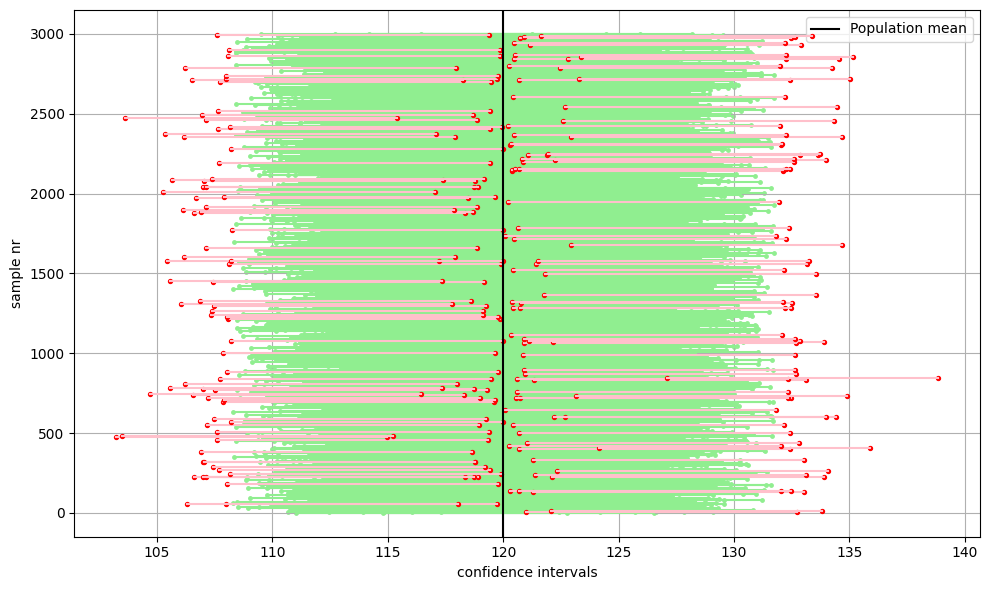

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Population parameters
population_mean = 120  # True population mean
population_std = 30    # Population standard deviation
sample_size = 100       # Size of each random sample
num_samples = 3000      # Number of samples to draw

np.random.seed(42)

# To store intervals and sample means
confidence_intervals = []
sample_means = []

for _ in range(num_samples):
    # Create the sample
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

    # Calculate the confidence interval bounds
    z_critical = stats.norm.ppf(0.975, loc=0, scale=1)
    margin_of_error = z_critical * (population_std / np.sqrt(sample_size))
    sample_mean = np.mean(sample)
    bounds = [sample_mean-margin_of_error, sample_mean+margin_of_error]

    # Store the interval and the sample mean
    confidence_intervals.append(bounds)
    sample_means.append(sample_mean)

# Calculate the percentage of times the population_mean was within the calculated confidence interval bounds.
# Plotting each confidence interval using 'red' when population_mean is outside the confidence interval.
# Explain your results.

results = []
for interval in confidence_intervals:
    if interval[0] < population_mean and population_mean < interval[1]:
        results.append(1)
    else:
        results.append(0)
percentage = np.round((np.sum(results) / len(results))*100, 3)

print(f"For {num_samples} iterations, the population mean was within the confidence level around {percentage}% of the time")

plt.figure(figsize=(10,6))

for i, sample_mean in enumerate(sample_means):
    if results[i] == 1:
        plt.scatter(y=[i+1, i+1],
                    x=[confidence_intervals[i][0], confidence_intervals[i][1]],
                    marker = 'o',
                    color = 'lightgreen',
                    s=6,
                    )
        plt.plot([confidence_intervals[i][0], confidence_intervals[i][1]], 
                [i+1, i+1],
                color='lightgreen'
                )
        
    else:
        plt.scatter(y=[i+1, i+1],
                    x=[confidence_intervals[i][0], confidence_intervals[i][1]],
                    marker = 'o',
                    color = 'red',
                    s=8,
                    zorder=10
                    )
        
        plt.plot([confidence_intervals[i][0], confidence_intervals[i][1]], 
                 [i+1, i+1],
                 color='pink',
                 zorder=10
                 ) 

plt.axvline(x=population_mean, c='black', label='Population mean', zorder=100)
plt.legend()
plt.xlabel('confidence intervals')
plt.ylabel('sample nr')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# When we say that we have a 95% confidence for our interval, it means that we the range we have calculated will contain the 
# population mean in 95% of the cases. As we can see, if we generate a sample from a normal distribution, calculate a 95% confidence
# interval and check if it contained the population mean, we can see that we will get closer and closer to this percentage as we 
# increase number of iterations. In the plot above, the red ranges represent those which did not contain the population mean, which is
# obvious since they never cross the black line in the middle, which is the population mean. 